# Data Cleaning Operation on Titanic Dataset

Improting Librarys

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Reading The CSV File

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

Data description

In [8]:
print(df.head())
print(df.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [7]:
print(df.describe())
print(df.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

Missing Value Count

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Visualizing Missing Data



*   Using Percentage



In [4]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64




*   Using heatmap



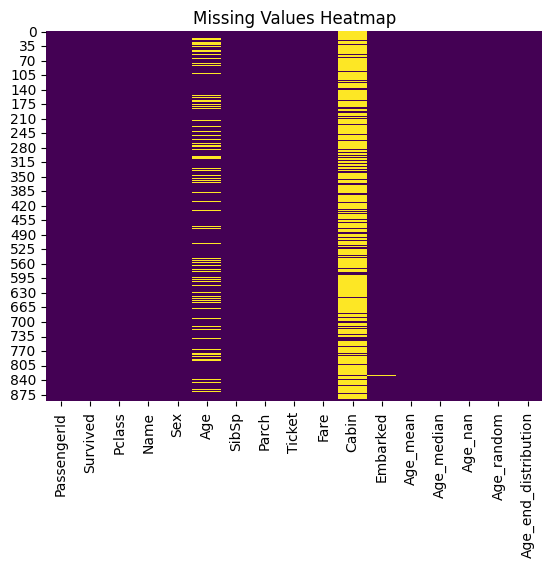

In [34]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Inputation of Missing Data

*   Handeling Age Feature



In this section we identify missing valies and try to fill them with various methods. to illustrate these methods we create indipendent collums for each method.

Mean Mode Median imputation

In [11]:
df['Age_mean']  = df['Age'].fillna(df['Age'].mean())
df['Age_median']  = df['Age'].fillna(df['Age'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
 13  Age_median   891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


Capturing nan with new feature

In [18]:
df['Age_nan'] = np.where(df['Age'].isnull,0,1)

Random Sample Input

In [19]:
df['Age_random'] = df['Age']
random_values = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
random_values.index = df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(),'Age_random'] = random_values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
 13  Age_median   891 non-null    float64
 14  Age_nan      891 non-null    int64  
 15  Age_random   891 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 111.5+ KB


End Of Distribution

In [21]:
extreme = (df['Age'].mean()+(3*df['Age'].std()))
df['Age_end_distribution'] = df['Age'].fillna(extreme)

Graph to compare Various Inputation Method



*   KDE



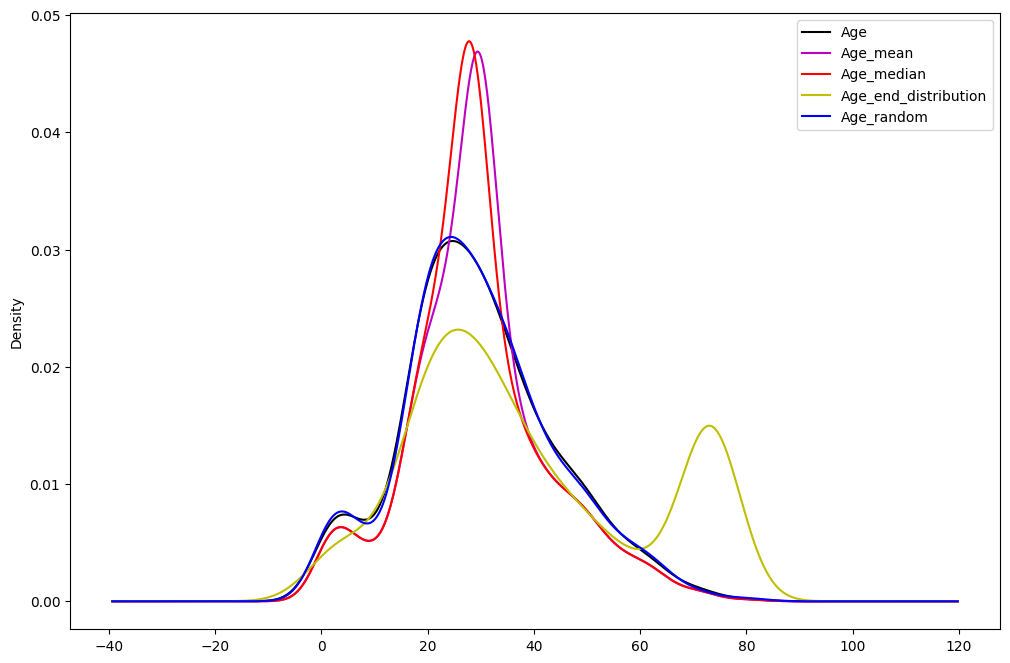

In [33]:
plt.figure(figsize=(12,8))
df.Age.plot(kind='kde',color='black')
df.Age_mean.plot(kind='kde',color='m')
df.Age_median.plot(kind='kde',color='r')
df.Age_end_distribution.plot(kind='kde',color='y')
df.Age_random.plot(kind='kde',color='b')
#df.Age_nan.plot(kind='kde',color='g')
plt.legend()

Histogram

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

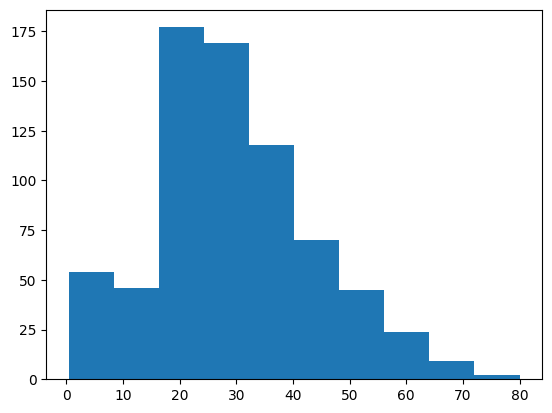

In [25]:
plt.hist(df.Age)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

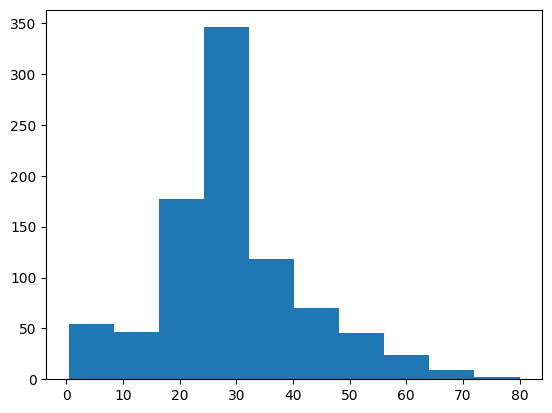

In [26]:
plt.hist(df.Age_mean)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

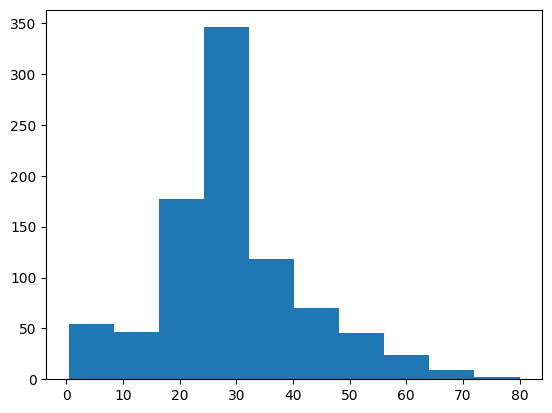

In [27]:
plt.hist(df.Age_median)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9., 179.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

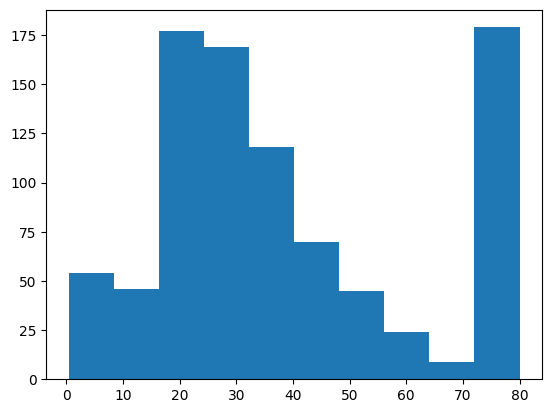

In [28]:
plt.hist(df.Age_end_distribution)

(array([ 70.,  54., 221., 209., 153.,  83.,  55.,  32.,  11.,   3.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

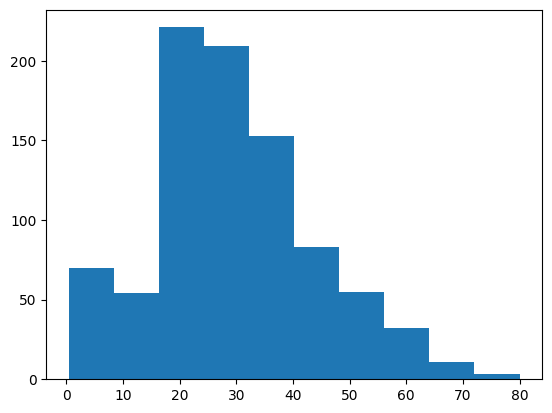

In [29]:
plt.hist(df.Age_random)

(array([  0.,   0.,   0.,   0.,   0., 891.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

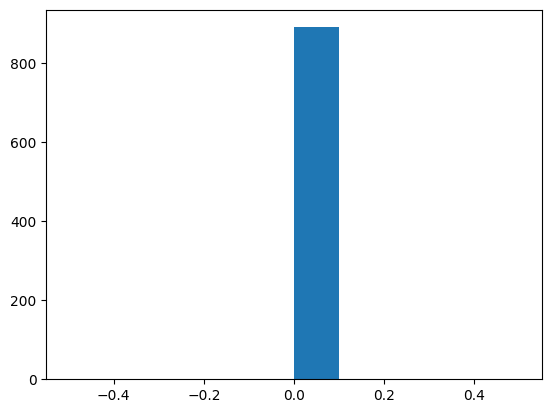

In [30]:
plt.hist(df['Age_nan'])

Handling Embarked feature

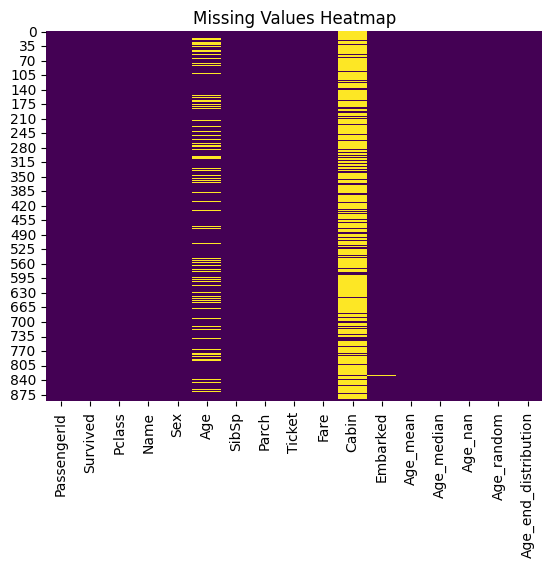

In [35]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Embarked Missing Value count

In [36]:
df['Embarked'].isnull().sum()

2

Unique Values In Embark

In [37]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Using MODE for inputation

In [38]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

Final Checking

In [39]:
df['Embarked'].isnull().sum()

0

Handling Cabin Feature

Frequent Catagorical inputation
    (Replace Missing Value with most Frequently occuring record)

In [41]:
most_freq_cate = df['Cabin'].value_counts().index[0]
most_freq_cate

'B96 B98'

In [42]:
df['Cabin_Freq_Cate'] = df['Cabin'].fillna(most_freq_cate)

Replace Missing Values with Mode

In [43]:
mode= df['Cabin'].mode()[1]
mode

'C23 C25 C27'

In [44]:
df['Cabin_mode'] = df['Cabin'].fillna(mode)

Replace Missing Values with New category

In [45]:
new_cat = ' Unknown'
df['Cabin_new_feature'] = df['Cabin'].fillna(new_cat)

# Droping A frature

In [47]:
df.drop('Cabin', axis=1, inplace=True)

In [49]:
df.to_csv('cleaned_without_cabin.csv')